### Libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


### Import data

In [3]:
df_supermarkets = pd.read_csv('supermarkets_data_enriched.csv')[['id',
                                                                'bfs_name',
                                                                'bfs_number',
                                                                'lat',
                                                                'lon',
                                                                'brand',
                                                                'pop',
                                                                'pop_dens',
                                                                'frg_pct',
                                                                'emp']]
df_supermarkets.head(5)

,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
0,33126515,Schänis,3315,47.155616,9.037915,Spar,3876,97.142857,13.054696,1408.0
1,280130028,Schänis,3315,47.155492,9.039666,ALDI,3876,97.142857,13.054696,1408.0
2,6122906632,Schänis,3315,47.158959,9.044477,Denner,3876,97.142857,13.054696,1408.0
3,9019298862,Schänis,3315,47.155185,9.038472,Lidl,3876,97.142857,13.054696,1408.0
4,36726161,Uznach,3339,47.226191,8.980329,Migros,6489,860.610080,27.862537,3500.0


remove missing values

In [4]:
df_supermarkets.dropna(inplace=True)
df_supermarkets.head(5)

,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
0,33126515,Schänis,3315,47.155616,9.037915,Spar,3876,97.142857,13.054696,1408.0
1,280130028,Schänis,3315,47.155492,9.039666,ALDI,3876,97.142857,13.054696,1408.0
2,6122906632,Schänis,3315,47.158959,9.044477,Denner,3876,97.142857,13.054696,1408.0
3,9019298862,Schänis,3315,47.155185,9.038472,Lidl,3876,97.142857,13.054696,1408.0
4,36726161,Uznach,3339,47.226191,8.980329,Migros,6489,860.610080,27.862537,3500.0


subset

In [5]:
df_sub = df_supermarkets.loc[df_supermarkets['brand'].isin(['Migros', 'Volg'])]
df_sub.head(5)

,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
4,36726161,Uznach,3339,47.226191,8.980329,Migros,6489,860.610080,27.862537,3500.0
8,48932835,Zürich,261,47.375020,8.522895,Migros,420217,4778.994655,32.458468,491193.0
11,83330862,Zürich,261,47.344749,8.529981,Migros,420217,4778.994655,32.458468,491193.0
12,119249170,Zürich,261,47.375255,8.536107,Migros,420217,4778.994655,32.458468,491193.0
15,262400822,Zürich,261,47.364072,8.530945,Migros,420217,4778.994655,32.458468,491193.0


train/ test samples from subset

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df_sub[['lat',
                                                            'lon',
                                                            'pop',
                                                            'pop_dens',
                                                            'frg_pct',
                                                            'emp']],
                                                            df_sub['brand'],
                                                            test_size= 0.2,
                                                            random_state=10)


### Fit classification tree

In [7]:
ctree = DecisionTreeClassifier(random_state=10,
                               max_depth= 5)
ctfit = ctree.fit(x_train, y_train)

ctpred = ctfit.predict(x_test)

Tree text representation and visualization

In [8]:
text = tree.export_text(ctfit,
                        feature_names= list(x_test.columns))

print(text)

|--- pop <= 3615.00
|   |--- lat <= 46.38
|   |   |--- pop_dens <= 19.41
|   |   |   |--- class: Volg
|   |   |--- pop_dens >  19.41
|   |   |   |--- lon <= 7.45
|   |   |   |   |--- pop_dens <= 129.20
|   |   |   |   |   |--- class: Migros
|   |   |   |   |--- pop_dens >  129.20
|   |   |   |   |   |--- class: Volg
|   |   |   |--- lon >  7.45
|   |   |   |   |--- class: Migros
|   |--- lat >  46.38
|   |   |--- lon <= 7.11
|   |   |   |--- lon <= 6.57
|   |   |   |   |--- lat <= 46.50
|   |   |   |   |   |--- class: Migros
|   |   |   |   |--- lat >  46.50
|   |   |   |   |   |--- class: Volg
|   |   |   |--- lon >  6.57
|   |   |   |   |--- class: Migros
|   |   |--- lon >  7.11
|   |   |   |--- emp <= 1577.50
|   |   |   |   |--- emp <= 795.00
|   |   |   |   |   |--- class: Volg
|   |   |   |   |--- emp >  795.00
|   |   |   |   |   |--- class: Volg
|   |   |   |--- emp >  1577.50
|   |   |   |   |--- lon <= 9.36
|   |   |   |   |   |--- class: Volg
|   |   |   |   |--- lon >  9.3

[Text(0.44921875, 0.9166666666666666, 'pop <= 3615.0\ngini = 0.41\nsamples = 556\nvalue = [396, 160]\nclass = Migros'),
 Text(0.1796875, 0.75, 'lat <= 46.385\ngini = 0.325\nsamples = 142\nvalue = [29, 113]\nclass = Migros'),
 Text(0.314453125, 0.8333333333333333, 'True  '),
 Text(0.0625, 0.5833333333333334, 'pop_dens <= 19.413\ngini = 0.391\nsamples = 15\nvalue = [11, 4]\nclass = Migros'),
 Text(0.03125, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Migros'),
 Text(0.09375, 0.4166666666666667, 'lon <= 7.447\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = Migros'),
 Text(0.0625, 0.25, 'pop_dens <= 129.202\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Migros'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Migros'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Migros'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = Migros'),
 Text(0.296875, 0.5833333

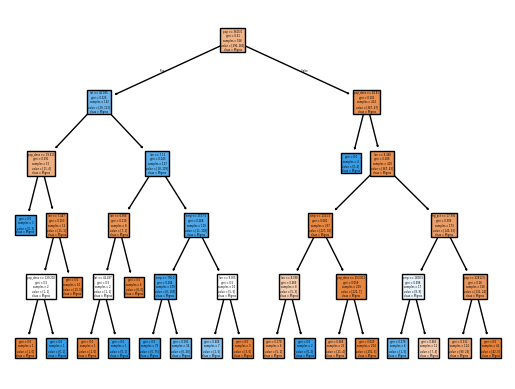

In [9]:
tree.plot_tree(ctfit,
               feature_names= list(x_test.columns),
               class_names= df_sub['brand'].tolist(),
               filled= True, )

Classification report and confussion matrix

In [10]:
print(f'Conf matrix:\n\n{confusion_matrix(y_test, ctpred)}\n\nClassification report: \n\n{classification_report(y_test, ctpred)}')

Conf matrix:

[[85  5]
 [19 31]]

Classification report: 

              precision    recall  f1-score   support

      Migros       0.82      0.94      0.88        90
        Volg       0.86      0.62      0.72        50

    accuracy                           0.83       140
   macro avg       0.84      0.78      0.80       140
weighted avg       0.83      0.83      0.82       140



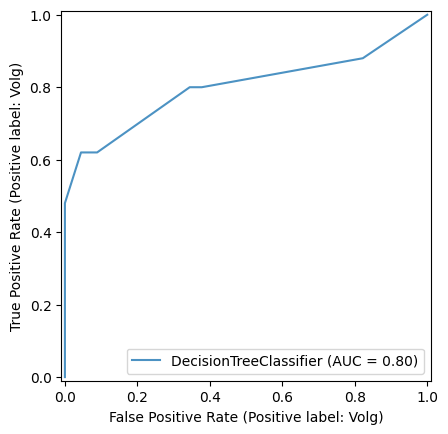

In [11]:
plt.figure()
ax = plt.gca()


ctfit_disp = RocCurveDisplay.from_estimator(ctfit, x_test, y_test, ax= ax, alpha= 0.8)

### Random Forest Classifier

In [12]:
rfc = RandomForestClassifier(random_state=10, max_depth=12)
rfcfit = rfc.fit(x_train, y_train)
rfcpred = rfc.predict(x_test)

In [13]:
print('confusion matrix and classification report:')

print(f'\n{confusion_matrix(y_test, rfcpred)}\n\n{classification_report(y_test, rfcpred)}')

confusion matrix and classification report:

[[79 11]
 [15 35]]

              precision    recall  f1-score   support

      Migros       0.84      0.88      0.86        90
        Volg       0.76      0.70      0.73        50

    accuracy                           0.81       140
   macro avg       0.80      0.79      0.79       140
weighted avg       0.81      0.81      0.81       140



<Axes: ylabel='features'>

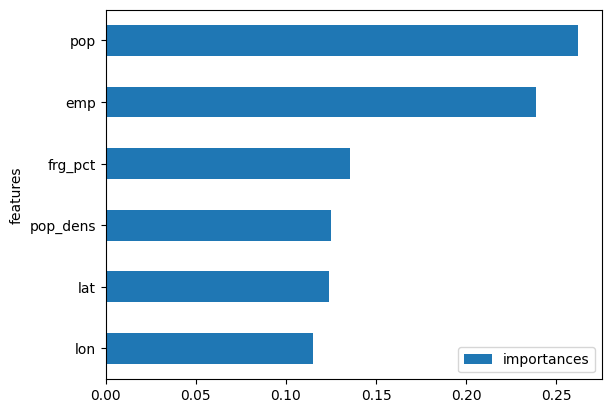

In [14]:
cols = x_train.columns
importances = rfcfit.feature_importances_
df_fi = pd.DataFrame({'features': cols, 'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh',
           y = 'importances',
           x = 'features')

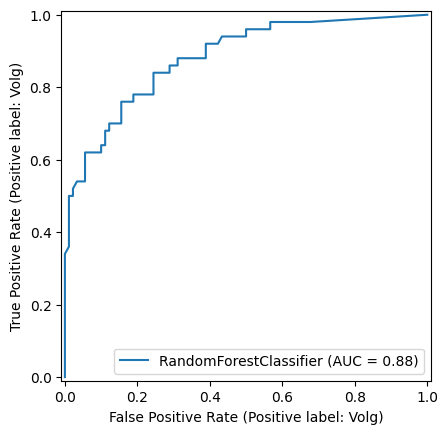

In [15]:
plt.figure()
ax = plt.gca()
disp = RocCurveDisplay.from_estimator(rfcfit, 
                                      x_test, 
                                      y_test,
                                      ax=ax,)